# S4E2 - EDA

Goal is to classify weight class given physical and lifestyle information

### Explanation of Features

* `FAVC`: Frequent consumption of high caloric food
* `FCVC`: Frequency of consumption of vegetables
* `NCP`: Number of main meals
* `CAEC`: Consumption of food between meals
* `CH20`: Consumption of water daily
* `CALC`: Consumption of alcohol 

The attributes related with the physical condition are: 
* `SCC`: Calories consumption monitoring
* `FAF`: Physical activity frequency
* `TUE`: Time using technology devices
* `MTRANS`: Transportation used

Other Features:
* `Age`
* `Sex`
* `Weight`
* `Height`
* `Smoke`
* `Family_history_with_overweight`



# Installs

In [1]:
!pip install -q scienceplots

# Imports

In [2]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
sns.set_style('whitegrid')

import scienceplots
plt.style.use(['science','no-latex'])

import warnings
warnings.filterwarnings("ignore")

# Load Data

In [3]:
root_dir = '/kaggle/input/playground-series-s4e2'
train = pd.read_csv(root_dir + '/train.csv') 
test = pd.read_csv(root_dir + '/test.csv') 
ss = pd.read_csv(root_dir + '/sample_submission.csv')

# Top Level EDA

In [4]:
# print all sets 
print(f'Training Data Shape: {train.shape}') 
display(train.head()) 
print(f'Test Data Shape: {test.shape}') 
display(test.head()) 
print(f'Sample Submission Shape: {ss.shape}') 
display(ss.head())

Training Data Shape: (20758, 18)


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


Test Data Shape: (13840, 17)


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


Sample Submission Shape: (13840, 2)


,id,NObeyesdad
0,20758,Normal_Weight
1,20759,Normal_Weight
2,20760,Normal_Weight
3,20761,Normal_Weight
4,20762,Normal_Weight


In [5]:
display(train.describe().style.background_gradient(cmap='Greens'))
display(test.describe().style.background_gradient(cmap='Greens'))

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.500000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.462780,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.000000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.250000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.500000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.750000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.000000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000
mean,27677.500000,23.952740,1.698934,87.384504,2.442898,2.750610,2.032044,0.974532,0.611033
std,3995.408198,5.799814,0.088761,26.111819,0.531606,0.710927,0.611230,0.840361,0.608005
min,20758.000000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,24217.750000,20.000000,1.631662,65.000000,2.000000,3.000000,1.771781,0.001086,0.000000
50%,27677.500000,22.906342,1.700000,83.952968,2.358087,3.000000,2.000000,1.000000,0.552498
75%,31137.250000,26.000000,1.760710,111.157811,3.000000,3.000000,2.552388,1.571865,1.000000
max,34597.000000,61.000000,1.980000,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [6]:
def num_of_unique_elements(df):
    summary = pd.DataFrame(df.dtypes, columns=['dtypes']) 
    summary['missing#'] = df.isna().sum() 
    summary['missing%'] = (df.isna().sum())/len(df) 
    summary['uniques'] = df.nunique().values 
    summary['count'] = df.count().values 
    return summary

print(F'Train Data:')
display(num_of_unique_elements(train).style.background_gradient(cmap='Greens'))
print(F'Test Data:')
display(num_of_unique_elements(test).style.background_gradient(cmap='Greens'))


Train Data:


,dtypes,missing#,missing%,uniques,count
id,int64,0,0.000000,20758,20758
Gender,object,0,0.000000,2,20758
Age,float64,0,0.000000,1703,20758
Height,float64,0,0.000000,1833,20758
Weight,float64,0,0.000000,1979,20758
family_history_with_overweight,object,0,0.000000,2,20758
FAVC,object,0,0.000000,2,20758
FCVC,float64,0,0.000000,934,20758
NCP,float64,0,0.000000,689,20758
CAEC,object,0,0.000000,4,20758


Test Data:


,dtypes,missing#,missing%,uniques,count
id,int64,0,0.000000,13840,13840
Gender,object,0,0.000000,2,13840
Age,float64,0,0.000000,1539,13840
Height,float64,0,0.000000,1739,13840
Weight,float64,0,0.000000,1798,13840
family_history_with_overweight,object,0,0.000000,2,13840
FAVC,object,0,0.000000,2,13840
FCVC,float64,0,0.000000,828,13840
NCP,float64,0,0.000000,649,13840
CAEC,object,0,0.000000,4,13840


In [7]:
obj_cols = [col for col in train.columns if train[col].dtype=='object']
numeric_cols = [col for col in train.columns if train[col].dtype=='float']
bool_cols = [col for col in train.columns if train[col].nunique() == 2]
print(f'There are {len(obj_cols)} categorical columns, {len(bool_cols)} which are boolean, and {len(numeric_cols)} numeric (float) columns')


There are 9 categorical columns, 5 which are boolean, and 8 numeric (float) columns


### Takeaways
* There are 9 categorical columns, 5 which are booelan, and 8 numeric (float) columns
* Not a huge dataset: Train 20.7K files, Test 13.8K files
* No missing data

# Data Cleaning and type conversion
* Convert to lower
* Drop id column
* convert dtypes

In [8]:
def cols_to_lower(df):
    df.columns = df.columns.str.lower()
    return df

def drop_cols(df,drop_cols):
    df = df.drop(columns=drop_cols)
    return df

def convert_dtypes(df):
    for col in df.columns:
        if df[col].nunique() == 2:
            vals = df[col].unique()
            if vals[0] == 'no':
                df[col] = df[col].map({vals[1]:True,vals[0]:False}).astype(bool)
            else:
                df[col] = df[col].map({vals[0]:True,vals[1]:False}).astype(bool)   
                
        elif df[col].dtype == 'object':
            df[col] = df[col].astype('category')
    return df

def rename_cols(df,col_name,new_name):
    df = df.rename(columns={col_name: new_name})
    return df

# perform conversions
train = convert_dtypes(drop_cols(cols_to_lower(train),'id'))
test = convert_dtypes(drop_cols(cols_to_lower(test),'id'))
train = rename_cols(train,'gender','sex_m')
test = rename_cols(test,'gender','sex_m')

train = rename_cols(train,'nobeyesdad','weight_class')

# repopulate the list of column types since changed names
cat_cols = [col for col in test.columns if test[col].dtype=='category']
numeric_cols = [col for col in train.columns if train[col].dtype=='float']
bool_cols = [col for col in train.columns if train[col].nunique() == 2]

train.head()

,sex_m,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,weight_class
0,True,24.443011,1.699998,81.669950,True,True,2.000000,2.983297,Sometimes,False,2.763573,False,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,False,18.000000,1.560000,57.000000,True,True,2.000000,3.000000,Frequently,False,2.000000,False,1.000000,1.000000,no,Automobile,Normal_Weight
2,False,18.000000,1.711460,50.165754,True,True,1.880534,1.411685,Sometimes,False,1.910378,False,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,False,20.952737,1.710730,131.274851,True,True,3.000000,3.000000,Sometimes,False,1.674061,False,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,True,31.641081,1.914186,93.798055,True,True,2.679664,1.971472,Sometimes,False,1.979848,False,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [9]:
weight_categories = sorted(list(train.weight_class.value_counts().index))
ordered_weight = weight_categories[0:2] + \
                 [x for x in weight_categories if 'Over' in x] + \
                 [x for x in weight_categories if 'Obes' in x]

# EDA - Univariate Feature Distributions

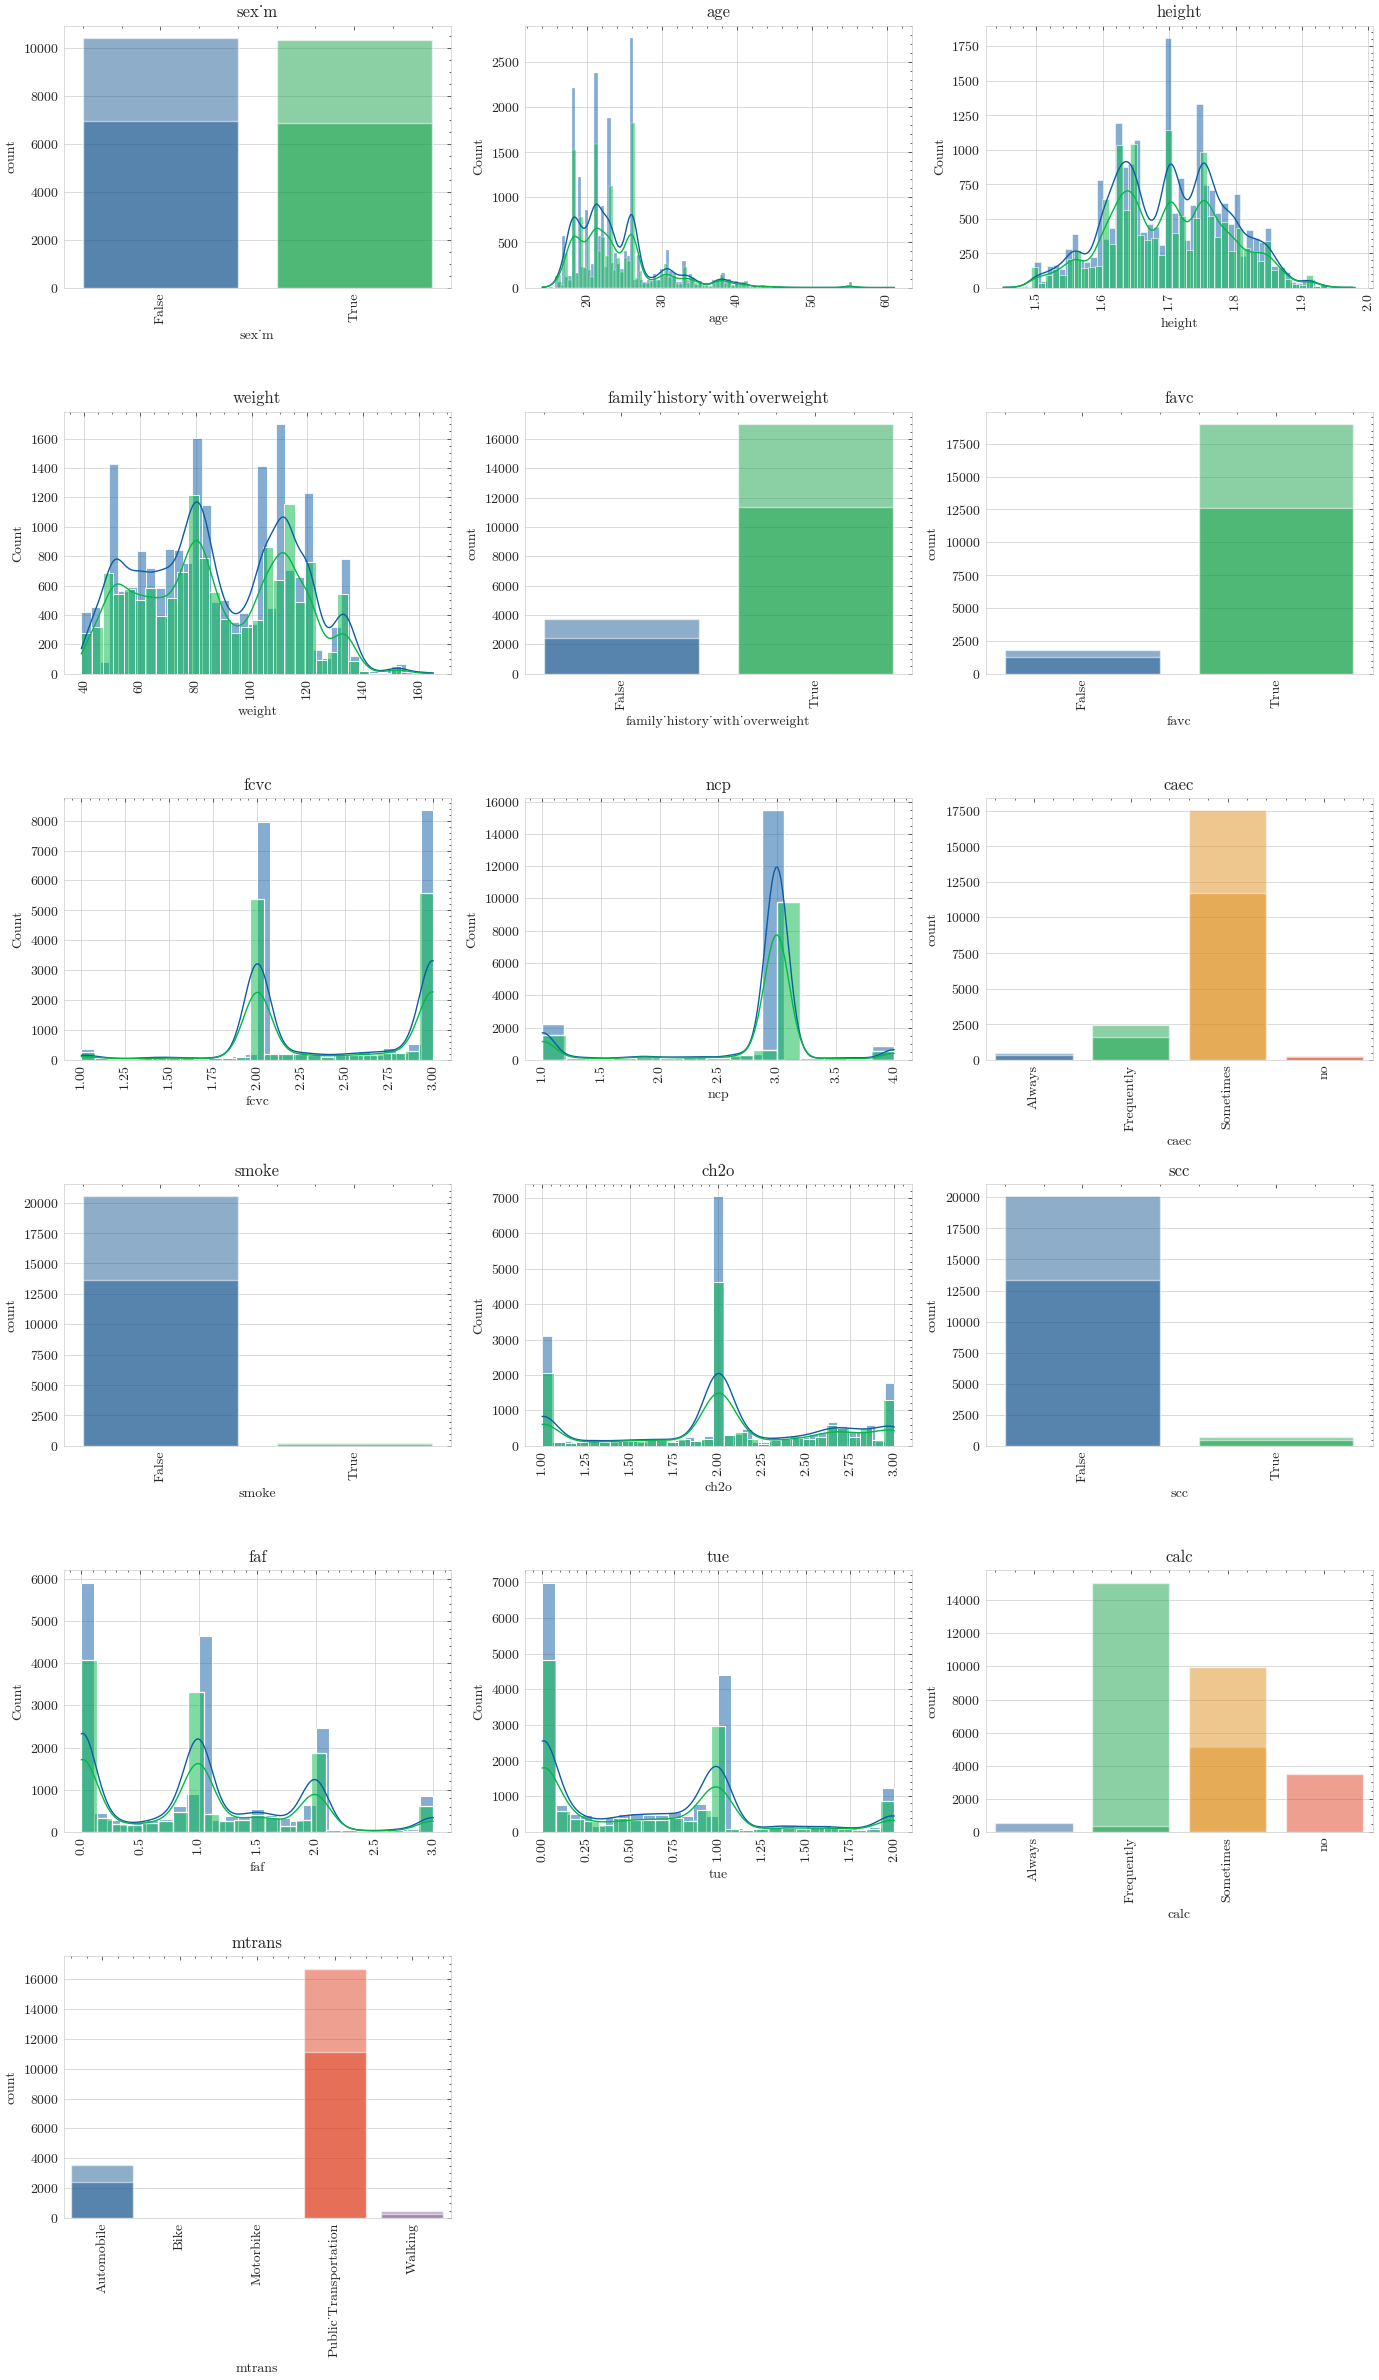

In [10]:
features = [col for col in test.columns]
rows = int(np.ceil(len(features)/3)) 

plt.figure(figsize=(14,4*rows),tight_layout=True) 
for i,col in enumerate(features): 
    plt.subplot(rows,3,i+1) 
    if train[col].dtype == 'float':
        sns.histplot(train[col],kde=True) 
        sns.histplot(test[col], kde=True)
    else:
        sns.countplot(x=col, data=train,alpha=.5)
        sns.countplot(x=col, data=test,alpha=.5)
    plt.xticks(rotation=90)
    plt.title(col)

## Target Distribution

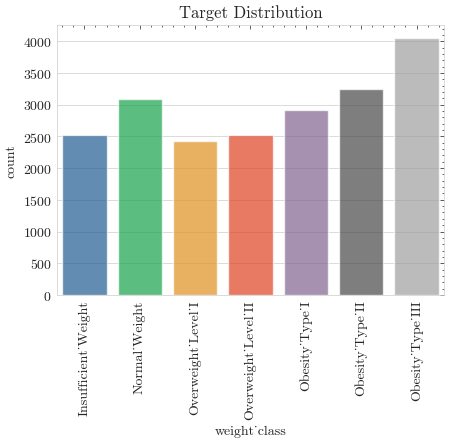

In [11]:
plt.figure(figsize=(5,3.5))
sns.countplot(x='weight_class', data=train, alpha=0.7,order=ordered_weight)
plt.xticks(rotation=90)
plt.title('Target Distribution');

# EDA - Float features vs Target
* TODO: Order is not correct

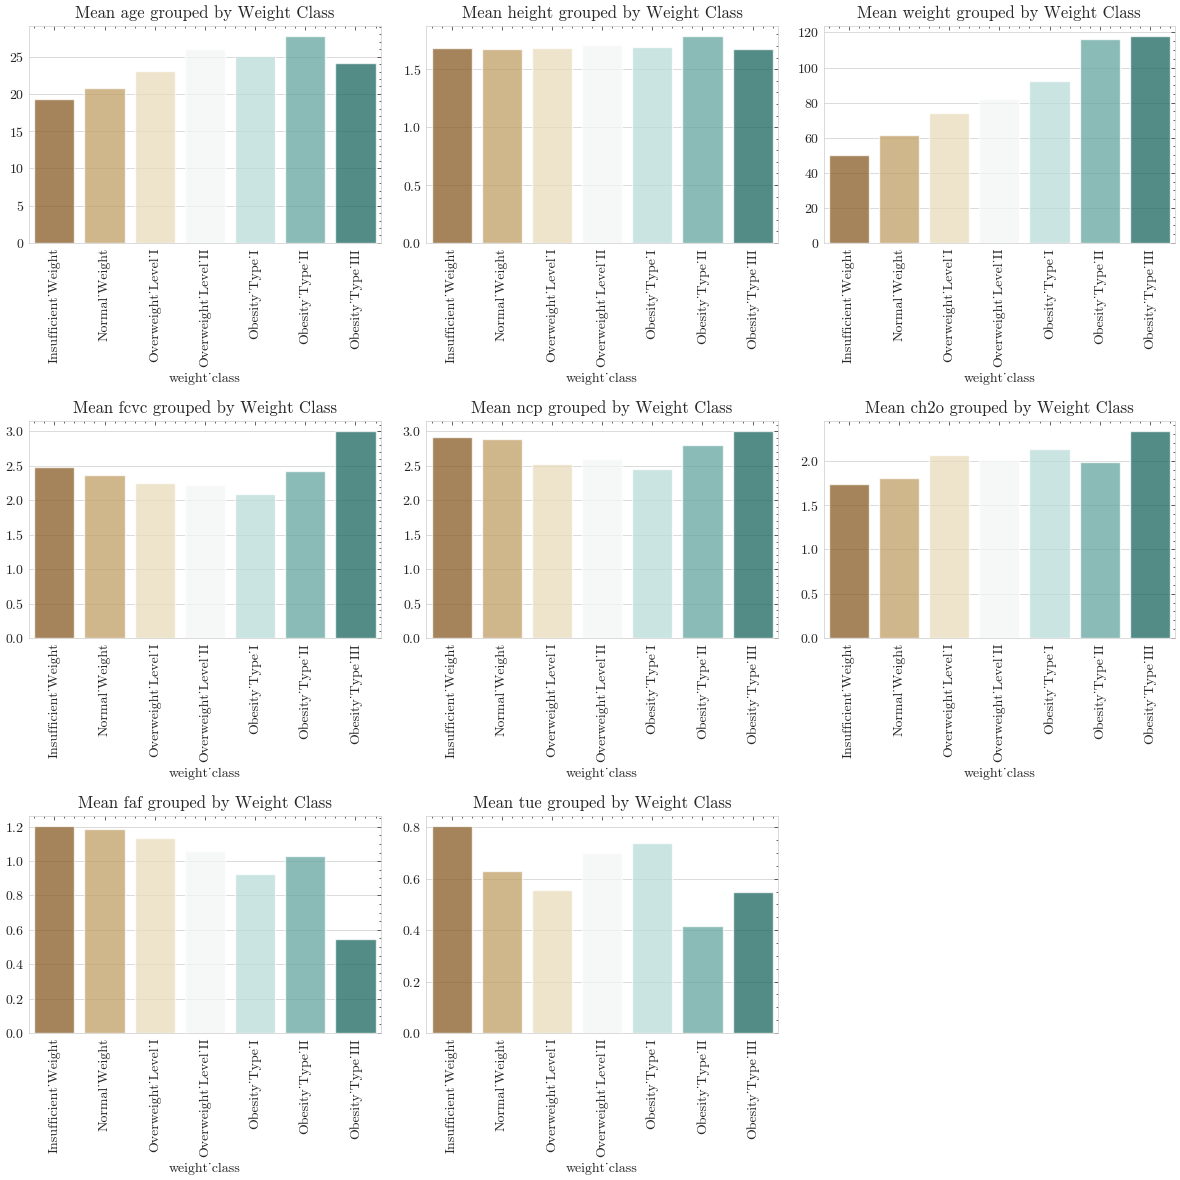

In [12]:
feats = numeric_cols
rows = int(np.ceil(len(feats)/3)) 
plt.figure(figsize=(12,4*rows),tight_layout=True) 

for i,col in enumerate(feats): 
    plt.subplot(rows,3,i+1) 
    grp = train.groupby('weight_class')[col].mean()
    sns.barplot(x=grp.index, y = grp.values,alpha=.75,palette='BrBG',order=ordered_weight)
    plt.xticks(rotation = 90)
    plt.title(f'Mean {col} grouped by Weight Class')
plt.show()

## EDA - Boolean Columns vs. Weight Class

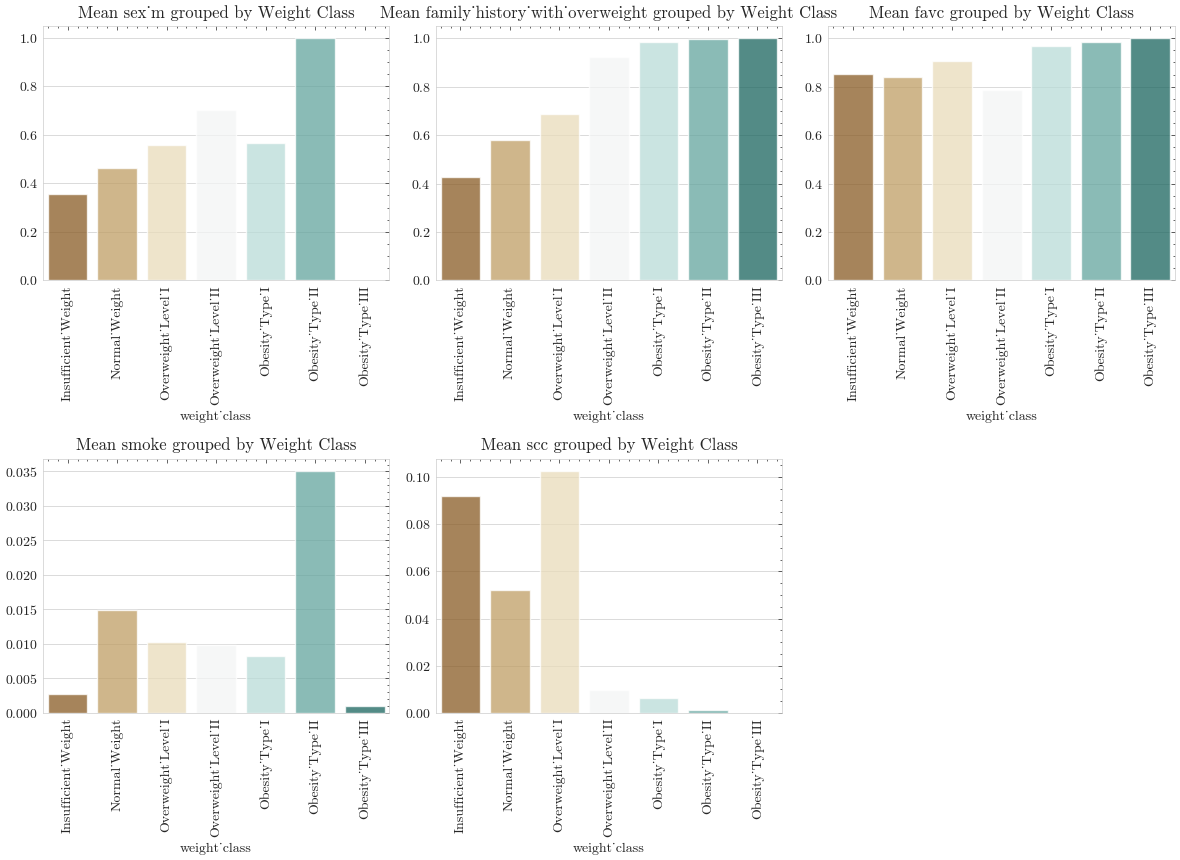

In [13]:
feats = bool_cols
rows = int(np.ceil(len(feats)/3)) 
plt.figure(figsize=(12,4.4*rows),tight_layout=True) 
for i,col in enumerate(feats): 
    plt.subplot(rows,3,i+1) 
    grp = train.groupby('weight_class')[col].mean()
    sns.barplot(x=grp.index, y = grp.values,alpha=.75,palette='BrBG',order=ordered_weight)
    plt.xticks(rotation = 90)
    plt.title(f'Mean {col} grouped by Weight Class')
plt.show()

### Look closer at sex in Obesity Type II and III

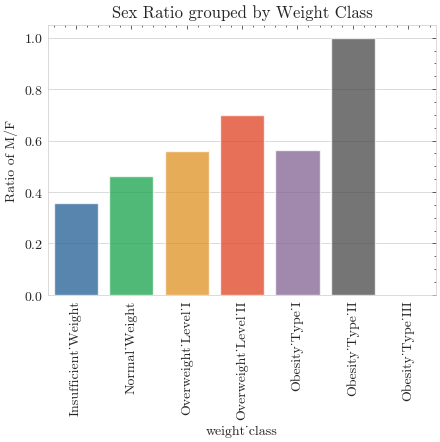

In [14]:
plt.figure(figsize=(5,3.5))
grp = train.groupby('weight_class')['sex_m'].mean()
sns.barplot(x=grp.index, y = grp.values,alpha=.75,order=ordered_weight)
plt.xticks(rotation = 90)
plt.title(f'Sex Ratio grouped by Weight Class')
plt.ylabel('Ratio of M/F')
plt.show()

* Something is up with Obesity type II having ~100% males and Obesity type III having ~100% females
    * 3240/3248 of obesity type II are men
    * 5/4046 of obesity type III are men


* Look at weight distribution in these categories and split that way.
* Or can check with submissions if the same characteristic is in the test data.

### Investigation - Sex in Type II vs Type III Obesity

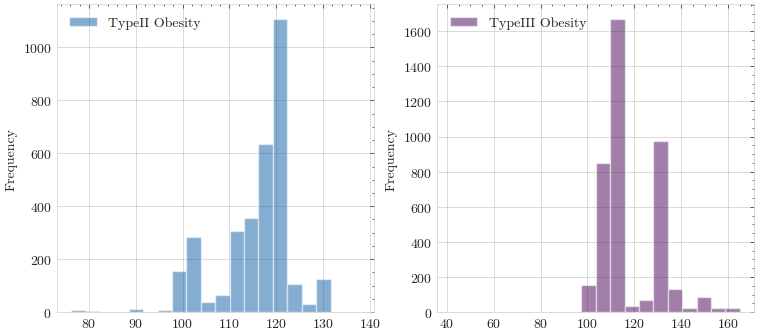

In [15]:
trainII = train[train.weight_class=='Obesity_Type_II']
trainIII = train[train.weight_class=='Obesity_Type_III']

plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
trainII.weight.plot(kind='hist',bins=20,alpha=.5,label='TypeII Obesity')
plt.legend()
plt.subplot(1,2,2)
trainIII.weight.plot(kind='hist',bins=20,alpha=.5,label='TypeIII Obesity',cmap='viridis')
plt.legend()
plt.show()

* These are definately bimodal
* I think I will split at around 105 for type II and 120 for type III

## EDA - Categorical Columns

In [16]:
# feats = cat_cols
# rows = int(np.ceil(len(feats)/3)) 
# plt.figure(figsize=(12,4.4*rows),tight_layout=True) 
# for i,col in enumerate(feats): 
#     plt.subplot(rows,3,i+1) 
#     grp = train.groupby(weight_class).col.count()
#     sns.countplot(x=grp.index, y = grp.values,alpha=.75,palette='BrBG',order=ordered_weight)
#     plt.xticks(rotation = 90)
#     plt.title(f'{col} count grouped by weight class')
# plt.show()

## Corellations

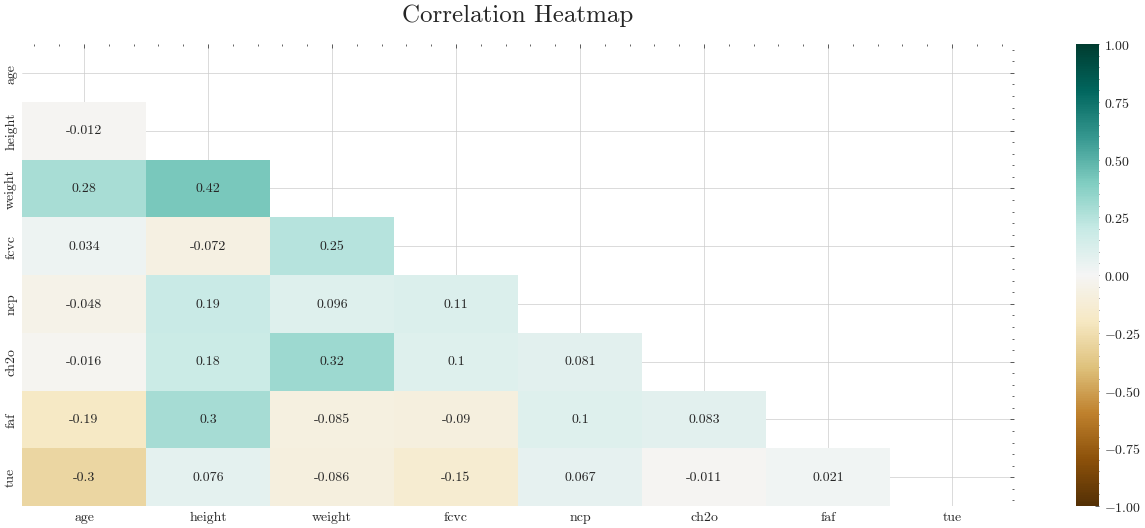

In [17]:
plt.figure(figsize=(16, 6)) 
mask = np.triu(np.ones_like(train[numeric_cols].corr(),dtype=bool)) 
heatmap = sns.heatmap(train[numeric_cols].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG') 
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

# Preprocessing

## One hot encode categorical columns
* Categorical columns are: 'caec', 'calc', 'mtrans'
* Target is also categorical


In [18]:
def ohe_cols(df,cols):
    df = pd.get_dummies(df, columns=cols,drop_first=True)
    return df

train = ohe_cols(train,cat_cols)
test = ohe_cols(test,cat_cols)

## Encode target with ordinal encoder
* Using ordinal encoder doesn't give correct order, so do it manually

In [19]:
enc = dict(zip(ordered_weight,range(len(ordered_weight))))   
train.weight_class = train.weight_class.map(enc)       

In [20]:
train.head()

,sex_m,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,smoke,ch2o,scc,faf,tue,weight_class,caec_Frequently,caec_Sometimes,caec_no,calc_Sometimes,calc_no,mtrans_Bike,mtrans_Motorbike,mtrans_Public_Transportation,mtrans_Walking
0,True,24.443011,1.699998,81.669950,True,True,2.000000,2.983297,False,2.763573,False,0.000000,0.976473,3,False,True,False,True,False,False,False,True,False
1,False,18.000000,1.560000,57.000000,True,True,2.000000,3.000000,False,2.000000,False,1.000000,1.000000,1,True,False,False,False,True,False,False,False,False
2,False,18.000000,1.711460,50.165754,True,True,1.880534,1.411685,False,1.910378,False,0.866045,1.673584,0,False,True,False,False,True,False,False,True,False
3,False,20.952737,1.710730,131.274851,True,True,3.000000,3.000000,False,1.674061,False,1.467863,0.780199,6,False,True,False,True,False,False,False,True,False
4,True,31.641081,1.914186,93.798055,True,True,2.679664,1.971472,False,1.979848,False,1.967973,0.931721,3,False,True,False,True,False,False,False,True,False
